# Machine Learning Algorithms Comparitive Analysis for prediction of Diabetes


### Importing Libraries


In [1]:
import os

os.environ["PYDEVD_DISABLE_FILE_VALIDATION"] = "1"

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential, clone_model
from keras.layers import Dense, Dropout

# from scikeras.wrappers import KerasClassifier
import sklearn as sk
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset


In [3]:
df = pd.read_csv(
    "/Users/hassanshahzad/Desktop/Westminster/Year3/FinalYearProject/SugarCheck/Dataset/balanced_diabetes_data.csv"
)
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
# Checking for null values
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [5]:
# Checking for data types
df.info()

# Coverting columns to lower case
df.columns = map(str.lower, df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 1022 non-null   int64 
 1   Gender              1022 non-null   object
 2   Polyuria            1022 non-null   object
 3   Polydipsia          1022 non-null   object
 4   sudden weight loss  1022 non-null   object
 5   weakness            1022 non-null   object
 6   Polyphagia          1022 non-null   object
 7   Genital thrush      1022 non-null   object
 8   visual blurring     1022 non-null   object
 9   Itching             1022 non-null   object
 10  Irritability        1022 non-null   object
 11  delayed healing     1022 non-null   object
 12  partial paresis     1022 non-null   object
 13  muscle stiffness    1022 non-null   object
 14  Alopecia            1022 non-null   object
 15  Obesity             1022 non-null   object
 16  class               1022

### Data Visualization


Text(0.5, 1.0, 'Diabetes distribution by age')

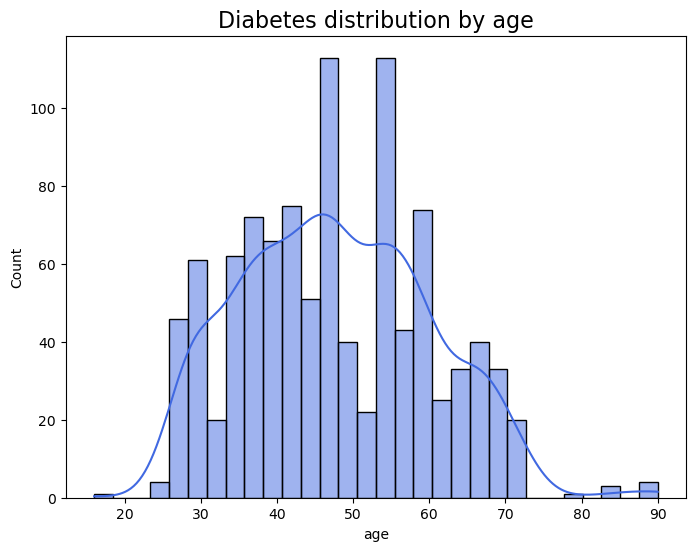

In [6]:
# Diabetes distribution by age
plt.figure(figsize=(8, 6))
sns.histplot(df["age"], bins=30, color="royalblue", kde=True)
plt.title("Diabetes distribution by age", fontsize=16)

/Users/hassanshahzad/anaconda3/envs/Conda-FYP-App/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/hassanshahzad/anaconda3/envs/Conda-FYP-App/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: title={'center': 'Diabetes cases by Gender'}, xlabel='gender', ylabel='count'>

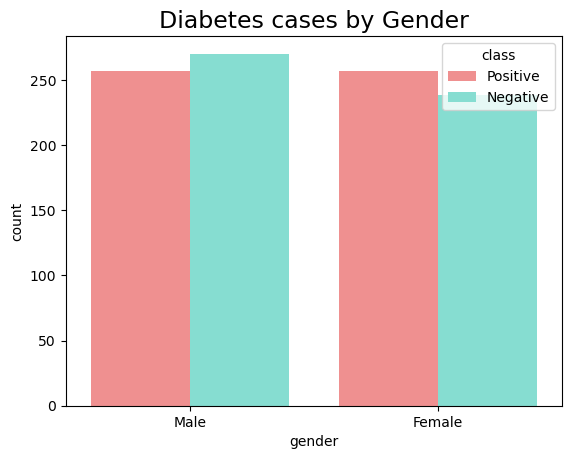

In [7]:
# Diabetes distribution by gender
plt.title("Diabetes cases by Gender", fontsize=17)
sns.countplot(x="gender", hue="class", data=df, palette=["#ff8080", "#78ebdc"])

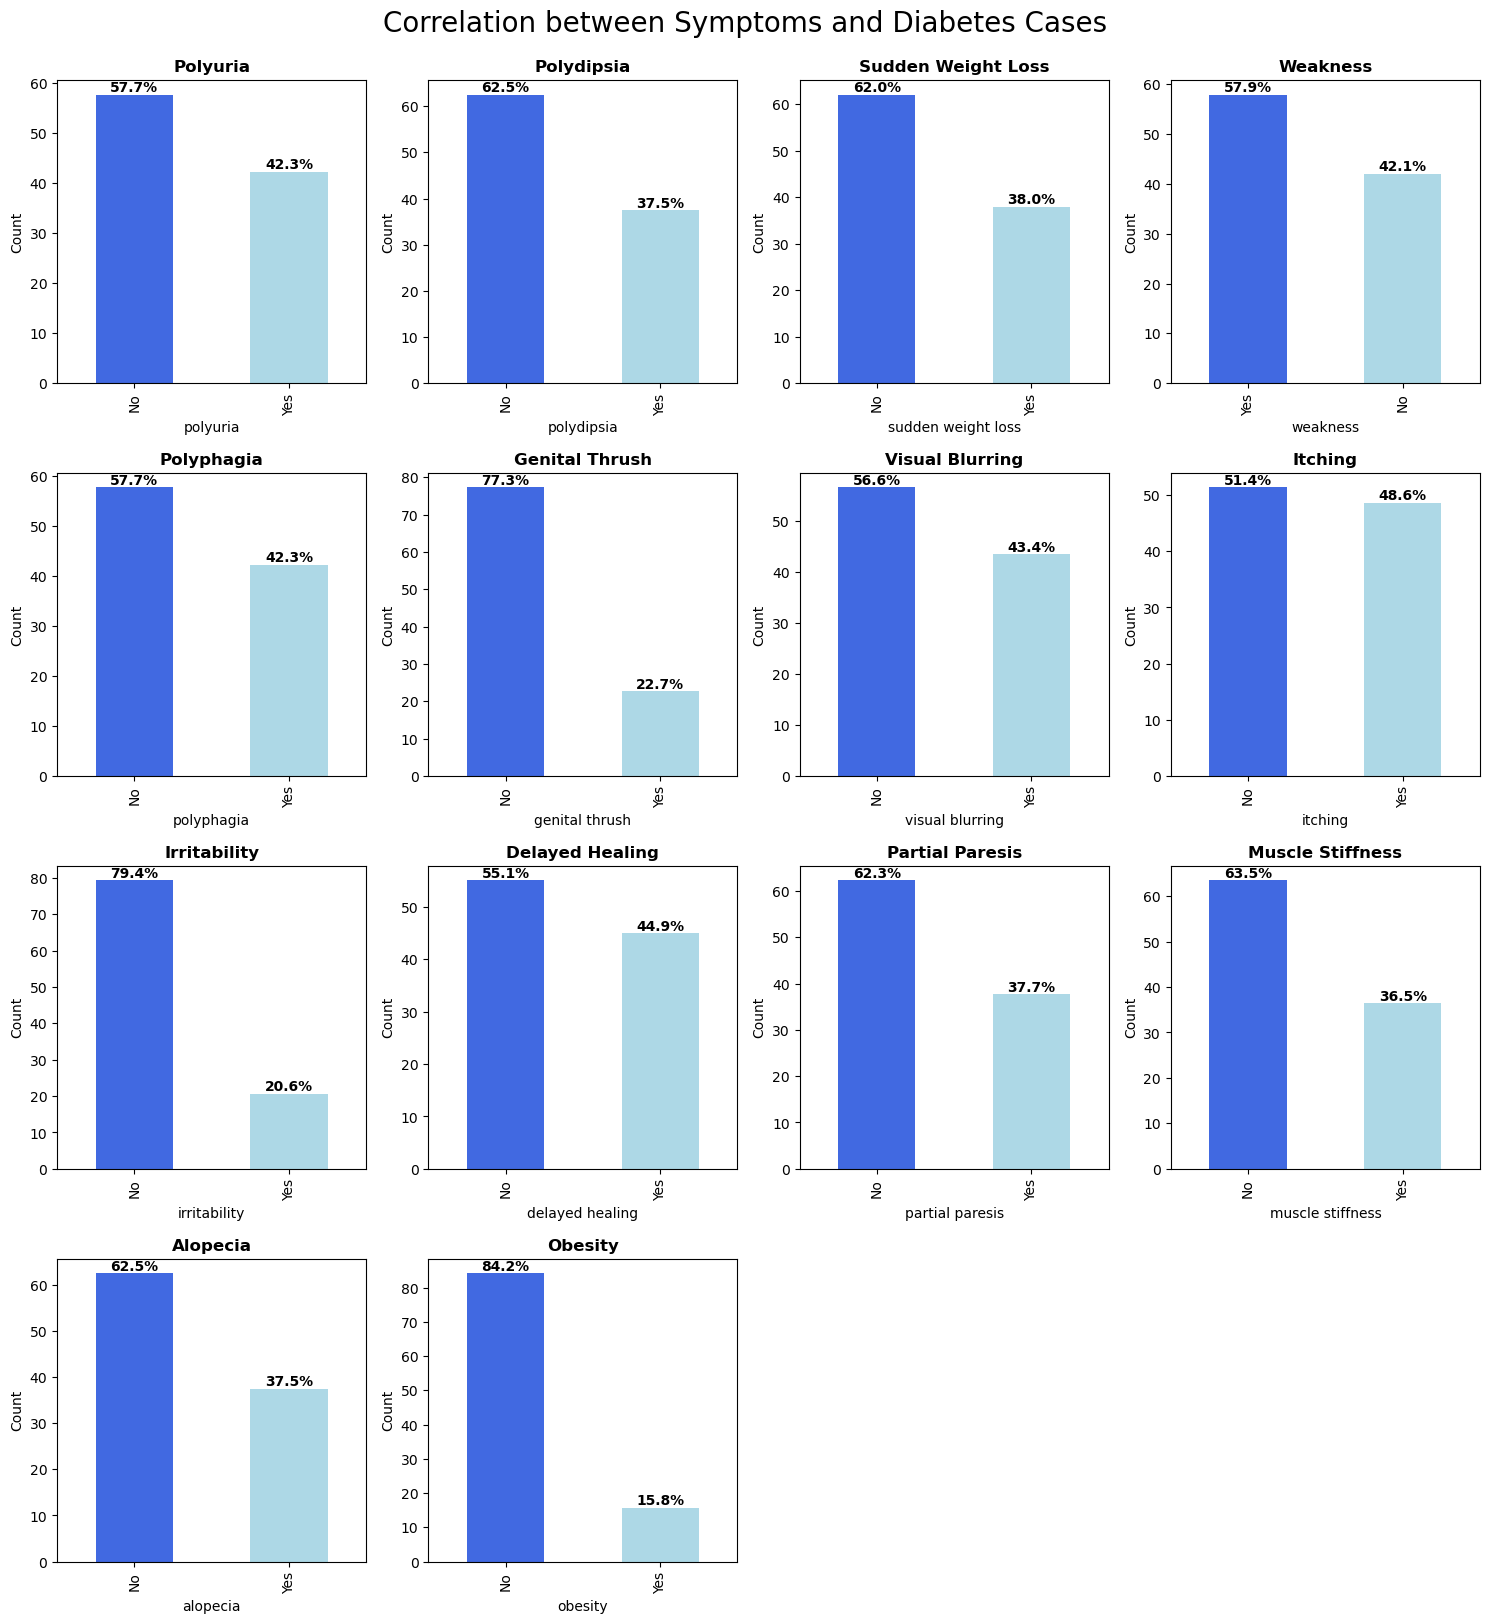

In [8]:
# Bar plots for symptoms and diabetes cases
count = 1
plt.figure(figsize=(15, 20))
plt.suptitle("Correlation between Symptoms and Diabetes Cases" + "\n", fontsize=20)
for i in df.columns:
    if i not in ["class", "age", "gender"]:
        plt.subplot(5, 4, count)
        plt.title(f"{i.title()}", fontweight="bold", fontsize=14)
        count += 1
        plt.tight_layout()
        total_count = df[i].value_counts()
        total_percentage = total_count / total_count.sum() * 100
        total_percentage.plot(kind="bar", color=["royalblue", "lightblue"])
        plt.ylabel("Count")
        plt.title(f"{i.title()}", fontweight="bold", fontsize=12)
        for j, v in enumerate(total_percentage):
            plt.text(j, v, f"{v:.1f}%", ha="center", va="bottom", fontweight="bold")
plt.show()

### Data Preprocessing


In [9]:
# Changing positive to 1 and negative to 0
df["class"] = df["class"].replace({"Positive": 1, "Negative": 0})

# Seperating target feature from dataset
X = df.drop("class", axis=1)
y = df["class"]

# Storing features to list
objectList = X.select_dtypes(include="object").columns.tolist()
print(objectList)

['gender', 'polyuria', 'polydipsia', 'sudden weight loss', 'weakness', 'polyphagia', 'genital thrush', 'visual blurring', 'itching', 'irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'alopecia', 'obesity']


/var/folders/9q/92k_9l3n5ns5d3nl7jnxq0gr0000gn/T/ipykernel_55839/1584962235.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["class"] = df["class"].replace({"Positive": 1, "Negative": 0})


In [10]:
# Label Encoding for object to numeric transformation
encoder = preprocessing.LabelEncoder()

for col in X.columns:
    if X[col].dtype == "object":
        X[col] = encoder.fit_transform(X[col])

# Printing datatypes of features
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 1022 non-null   int64
 1   gender              1022 non-null   int64
 2   polyuria            1022 non-null   int64
 3   polydipsia          1022 non-null   int64
 4   sudden weight loss  1022 non-null   int64
 5   weakness            1022 non-null   int64
 6   polyphagia          1022 non-null   int64
 7   genital thrush      1022 non-null   int64
 8   visual blurring     1022 non-null   int64
 9   itching             1022 non-null   int64
 10  irritability        1022 non-null   int64
 11  delayed healing     1022 non-null   int64
 12  partial paresis     1022 non-null   int64
 13  muscle stiffness    1022 non-null   int64
 14  alopecia            1022 non-null   int64
 15  obesity             1022 non-null   int64
dtypes: int64(16)
memory usage: 127.9 KB


In [11]:
# Printing first 5 rows of dataset
X.head()

,age,gender,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


<Axes: title={'center': 'Correlation with Diabetes'}>

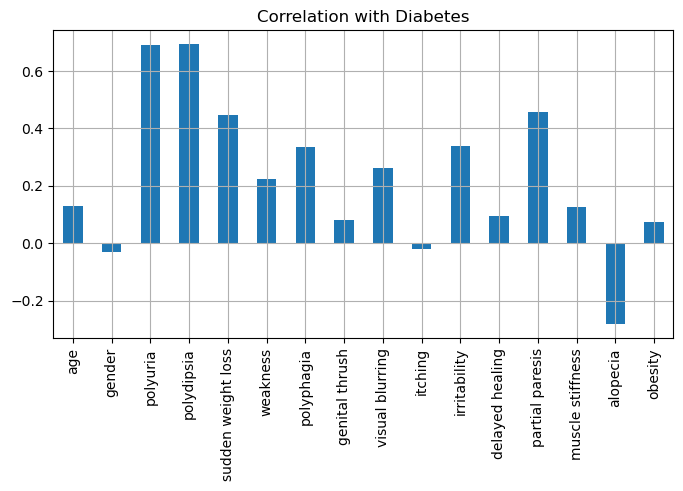

In [12]:
# Correlation between features and diabetes
X.corrwith(y).plot(
    kind="bar", grid=True, figsize=(8, 4), title="Correlation with Diabetes"
)

In [13]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=40
)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (817, 16) (817,)
Testing set shape: (205, 16) (205,)


### Data Normalization


In [14]:
minmax = MinMaxScaler()
X_train[["age"]] = minmax.fit_transform(X_train[["age"]])
X_test[["age"]] = minmax.transform(X_test[["age"]])
X_train.head()

,age,gender,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity
34,0.445946,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0
885,0.148649,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
514,0.513514,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0
369,0.418919,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
781,0.554054,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0


### Model Building


##### Logistic Regression


In [15]:
lg = LogisticRegression(random_state=0, penalty="l2")
lg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [16]:
# Cross Validation
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
score = "accuracy"

acc_lg = model_selection.cross_val_score(lg, X_train, y_train, cv=kfold, scoring=score)
acc_lg.mean()

0.9082505269497141

In [17]:
# Evaluation Metrics
y_pred_lg = lg.predict(X_test)

lg_acc = accuracy_score(y_test, y_pred_lg)
lg_roc = roc_auc_score(y_test, y_pred_lg)
lg_prec = precision_score(y_test, y_pred_lg)
lg_rec = recall_score(y_test, y_pred_lg)
lg_f1 = f1_score(y_test, y_pred_lg)

results_lg = pd.DataFrame(
    [["Logistic Regression", lg_acc, acc_lg.mean(), lg_roc, lg_prec, lg_rec, lg_f1]],
    columns=[
        "Model",
        "Accuracy",
        "Cross Val Accuracy",
        "ROC",
        "Precision",
        "Recall",
        "F1 Score",
    ],
)

results_lg

,Model,Accuracy,Cross Val Accuracy,ROC,Precision,Recall,F1 Score
0,Logistic Regression,0.873171,0.908251,0.872619,0.885417,0.85,0.867347


##### Decision Trees Classifier


In [18]:
dt = DecisionTreeClassifier(criterion="gini", random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [19]:
# Cross Validation
acc_dt = model_selection.cross_val_score(dt, X_train, y_train, cv=kfold, scoring=score)
acc_dt.mean()

0.9204757603131588

In [20]:
# Evaluation Metrics
y_pred_dt = dt.predict(X_test)

dt_acc = accuracy_score(y_test, y_pred_dt)
dt_roc = roc_auc_score(y_test, y_pred_dt)
dt_prec = precision_score(y_test, y_pred_dt)
dt_rec = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

results_dt = pd.DataFrame(
    [
        [
            "Decision Trees Classifier",
            dt_acc,
            acc_dt.mean(),
            dt_roc,
            dt_prec,
            dt_rec,
            dt_f1,
        ]
    ],
    columns=[
        "Model",
        "Accuracy",
        "Cross Val Accuracy",
        "ROC",
        "Precision",
        "Recall",
        "F1 Score",
    ],
)

results_dt

,Model,Accuracy,Cross Val Accuracy,ROC,Precision,Recall,F1 Score
0,Decision Trees Classifier,0.887805,0.920476,0.886667,0.923077,0.84,0.879581


##### Random Forest Classifier


In [21]:
estimators = 100

for i in range(1, estimators):
    rf = RandomForestClassifier(n_estimators=i, criterion="entropy", random_state=0)
    rf.fit(X_train, y_train)

In [22]:
# Cross Validation
acc_rf = model_selection.cross_val_score(rf, X_train, y_train, cv=kfold, scoring=score)
acc_rf.mean()

0.9449262270400481

In [23]:
# Evaluation Metrics
y_pred_rf = rf.predict(X_test)

rf_acc = accuracy_score(y_test, y_pred_rf)
rf_roc = roc_auc_score(y_test, y_pred_rf)
rf_prec = precision_score(y_test, y_pred_rf)
rf_rec = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

results_rf = pd.DataFrame(
    [
        [
            "Random Forest Classifier",
            rf_acc,
            acc_rf.mean(),
            rf_roc,
            rf_prec,
            rf_rec,
            rf_f1,
        ]
    ],
    columns=[
        "Model",
        "Accuracy",
        "Cross Val Accuracy",
        "ROC",
        "Precision",
        "Recall",
        "F1 Score",
    ],
)

results_rf

,Model,Accuracy,Cross Val Accuracy,ROC,Precision,Recall,F1 Score
0,Random Forest Classifier,0.926829,0.944926,0.92619,0.947368,0.9,0.923077


##### Neural Networks


In [24]:
def create_model():
    model = Sequential(
        [
            Dense(16, input_dim=16, activation="relu"),
            Dropout(0.5),
            Dense(8, activation="relu"),
            Dropout(0.5),
            Dense(1, activation="sigmoid"),
        ]
    )
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model


nn = create_model()
nn.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=0)

In [25]:
# # Function to create model, required for KerasClassifier
# def create_model():
#     model = Sequential()
#     model.add(Dense(12, input_dim=16, activation='relu'))
#     model.add(Dense(8, activation='relu'))
#     model.add(Dense(1, activation='sigmoid'))
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#     return model

# # Wrap Keras model with KerasClassifier
# nn = KerasClassifier(build_fn=create_model, epochs=100, batch_size=5, verbose=0)

# nn.fit(X_train, y_train)

In [26]:
# Custom cross-validation
def custom_cross_val_score(model_func, X, y, n_splits=10):
    kfold = model_selection.StratifiedKFold(
        n_splits=n_splits, shuffle=True, random_state=7
    )
    scores = []

    for train_ix, test_ix in kfold.split(X, y):
        model = clone_model(model_func())
        model.compile(
            optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
        )
        X_train_fold, X_test_fold = X[train_ix], X[test_ix]
        y_train_fold, y_test_fold = y[train_ix], y[test_ix]
        model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=10, verbose=1)
        scores.append(model.evaluate(X_test_fold, y_test_fold, verbose=0)[1])

    return np.mean(scores)


acc_nn = custom_cross_val_score(create_model, X_train.values, y_train.values)

Epoch 1/100
74/74 [==============================] - 0s 672us/step - loss: 0.6904 - accuracy: 0.5333
Epoch 2/100
74/74 [==============================] - 0s 568us/step - loss: 0.6798 - accuracy: 0.5293
Epoch 3/100
74/74 [==============================] - 0s 548us/step - loss: 0.6567 - accuracy: 0.5959
Epoch 4/100
74/74 [==============================] - 0s 531us/step - loss: 0.6368 - accuracy: 0.6231
Epoch 5/100
74/74 [==============================] - 0s 566us/step - loss: 0.6191 - accuracy: 0.6245
Epoch 6/100
74/74 [==============================] - 0s 540us/step - loss: 0.5860 - accuracy: 0.6898
Epoch 7/100
74/74 [==============================] - 0s 551us/step - loss: 0.5415 - accuracy: 0.7116
Epoch 8/100
74/74 [==============================] - 0s 540us/step - loss: 0.4957 - accuracy: 0.7687
Epoch 9/100
74/74 [==============================] - 0s 567us/step - loss: 0.4855 - accuracy: 0.7673
Epoch 10/100
74/74 [==============================] - 0s 563us/step - loss: 0.5025 - accura

In [27]:
# Evaluation Metrics
y_pred_nn = nn.predict(X_test).ravel()
y_pred_nn_classes = (y_pred_nn > 0.5).astype(int)

nn_acc = accuracy_score(y_test, y_pred_nn_classes)
nn_roc = roc_auc_score(y_test, y_pred_nn)
nn_prec = precision_score(y_test, y_pred_nn_classes)
nn_rec = recall_score(y_test, y_pred_nn_classes)
nn_f1 = f1_score(y_test, y_pred_nn_classes)

results_nn = pd.DataFrame(
    [["Neural Network", nn_acc, acc_nn, nn_roc, nn_prec, nn_rec, nn_f1]],
    columns=[
        "Model",
        "Accuracy",
        "Cross Val Accuracy",
        "ROC",
        "Precision",
        "Recall",
        "F1 Score",
    ],
)

results_nn

7/7 [==============================] - 0s 674us/step


,Model,Accuracy,Cross Val Accuracy,ROC,Precision,Recall,F1 Score
0,Neural Network,0.921951,0.932626,0.965714,0.966667,0.87,0.915789


##### K-Nearest Neighbor


In [28]:
knn = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
# Cross Validation
acc_knn = model_selection.cross_val_score(
    knn, X_train, y_train, cv=kfold, scoring=score
)
acc_knn.mean()

0.9106895513399579

In [30]:
# Evaluation Metrics
y_pred_knn = knn.predict(X_test)

knn_acc = accuracy_score(y_test, y_pred_knn)
knn_roc = roc_auc_score(y_test, y_pred_knn)
knn_prec = precision_score(y_test, y_pred_knn)
knn_rec = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)

results_knn = pd.DataFrame(
    [
        [
            "K-Nearest Neighbors",
            knn_acc,
            acc_knn.mean(),
            knn_roc,
            knn_prec,
            knn_rec,
            knn_f1,
        ]
    ],
    columns=[
        "Model",
        "Accuracy",
        "Cross Val Accuracy",
        "ROC",
        "Precision",
        "Recall",
        "F1 Score",
    ],
)

results_knn

,Model,Accuracy,Cross Val Accuracy,ROC,Precision,Recall,F1 Score
0,K-Nearest Neighbors,0.887805,0.91069,0.886905,0.913978,0.85,0.880829


7/7 [==============================] - 0s 581us/step


/var/folders/9q/92k_9l3n5ns5d3nl7jnxq0gr0000gn/T/ipykernel_55839/1453880.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_results = pd.concat(


,Model,Accuracy,Cross Val Accuracy,ROC,Precision,Recall,F1 Score
0,Logistic Regression,87.317073,87.317073,87.261905,88.541667,85.0,86.734694
1,Decision Trees Classifier,88.780488,88.780488,88.666667,92.307692,84.0,87.958115
2,Random Forest Classifier,92.682927,92.682927,92.619048,94.736842,90.0,92.307692
3,Neural Networks,92.195122,92.195122,92.071429,96.666667,87.0,91.578947
4,KNN,88.780488,88.780488,88.690476,91.397849,85.0,88.082902


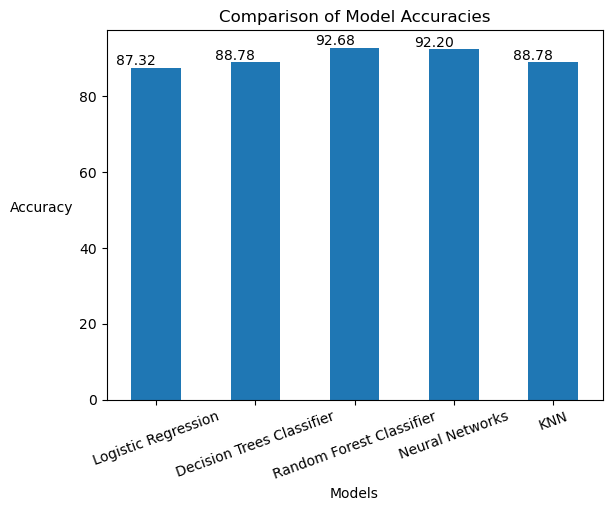

In [31]:
# Initialize a DataFrame to store the results
final_results = pd.DataFrame(
    columns=[
        "Model",
        "Accuracy",
        "Cross Val Accuracy",
        "ROC",
        "Precision",
        "Recall",
        "F1 Score",
    ]
)

# List of models and their names
models = [lg, dt, rf, nn, knn]
model_names = [
    "Logistic Regression",
    "Decision Trees Classifier",
    "Random Forest Classifier",
    "Neural Networks",
    "KNN",
]

for model, name in zip(models, model_names):
    # Predict the test set results
    y_pred = model.predict(X_test)

    if name == "Neural Networks":
        y_pred = (y_pred > 0.5).astype(int)

    # Calculate the evaluation metrics
    acc = accuracy_score(y_test, y_pred) * 100
    roc = roc_auc_score(y_test, y_pred) * 100
    prec = precision_score(y_test, y_pred) * 100
    rec = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    # Append the results to the DataFrame
    final_results = pd.concat(
        [
            final_results,
            pd.DataFrame(
                {
                    "Model": [name],
                    "Accuracy": [acc],
                    "Cross Val Accuracy": [acc.mean()],
                    "ROC": [roc],
                    "Precision": [prec],
                    "Recall": [rec],
                    "F1 Score": [f1],
                }
            ),
        ],
        ignore_index=True,
    )

final_results.plot(
    x="Model",
    y="Accuracy",
    kind="bar",
    title="Comparison of Model Accuracies",
    xlabel="Models",
    rot=20,
)
plt.ylabel("Accuracy", rotation=0, ha="right")
plt.gca().get_legend().remove()

# Add percentage labels to the bars
for i, v in enumerate(final_results["Accuracy"]):
    plt.text(i, v, f"{v:.2f}", ha="right", va="bottom")

# Print the final results
final_results